INFORMATION ABOUT DATA:
    
    -> THE DATASET IS TAKEN FROM KAGGLE, WHICH IS MATCHES.CSV AND DELIVERIES.CSV
    
    -> MATCHES.CSV CONTAINS THE INFORMATION REGRADING THE MATCH LIKE PLAYING TEAMS, TOSS, CITY, TOSS DECISION, DATE, RESULT
    
    -> DELIVERIES.CSV CONTAINS THE BALL TO BALL COVERAGE OF EACH MATCH IN THE MATCHES.CSV
    
    -> ALL THE DATA IS IN THE RANGE FROM 2008 TO 2018 WHICH RESULTS IN 11 SEASONS OF THE TOURNAMENT

OBJECTIVE:
    
    -> GETTING FAMILIAR WITH NUMPY, PANDAS, MATPLOTLIB, SEABORN
    
    -> ANALYZING THE BATSMENS, BOWLERS, TEAMS, RESULTS AND TOSS DECISIONS
    
    -> GENERATING THE INTERESTING STATS FROM THE DATA
    
    -> ANALYZING THE RESULTS OF TOSS RELATED DECISIONS

IMPORTING THE REQUIRED LIBRARIES AND LOADING THE DATA

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as s

df = pd.read_csv("matches.csv")

In [41]:
print(df.shape)
print(df.ndim)
print(df.columns)

(696, 18)
2
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


SAMPLE OF MATCHES IN SEASON 2017

In [42]:
df[0:2]

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2 umpire3  
0  NJ Llong     NaN  
1    S Ravi     NaN

SAMPLE OF MATCHES IN SEASON 2008

In [43]:
df[70:72]

id  season     city        date                  team1  \
70  71    2008  Chennai  2008-04-26  Kolkata Knight Riders   
71  72    2008   Mumbai  2008-04-27         Mumbai Indians   

                  team2            toss_winner toss_decision  result  \
70  Chennai Super Kings  Kolkata Knight Riders           bat  normal   
71      Deccan Chargers        Deccan Chargers         field  normal   

    dl_applied               winner  win_by_runs  win_by_wickets  \
70           0  Chennai Super Kings            0               9   
71           0      Deccan Chargers            0              10   

   player_of_match                            venue    umpire1  \
70        JDP Oram  MA Chidambaram Stadium, Chepauk  BF Bowden   
71    AC Gilchrist       Dr DY Patil Sports Academy  Asad Rauf   

           umpire2 umpire3  
70  AV Jayaprakash     NaN  
71      SL Shastri     NaN

SAMPLE OF MATCHES IN SEASON 2009

In [44]:
df[150:152]

id  season       city        date             team1  \
150  151    2009  Kimberley  2009-05-09   Deccan Chargers   
151  152    2009  Kimberley  2009-05-09  Rajasthan Royals   

                   team2       toss_winner toss_decision  result  dl_applied  \
150      Kings XI Punjab   Kings XI Punjab         field  normal           0   
151  Chennai Super Kings  Rajasthan Royals           bat  normal           0   

                  winner  win_by_runs  win_by_wickets   player_of_match  \
150      Kings XI Punjab            0               3  DPMD Jayawardene   
151  Chennai Super Kings            0               7       S Badrinath   

                     venue     umpire1          umpire2 umpire3  
150  De Beers Diamond Oval  GAV Baxter        AM Saheba     NaN  
151  De Beers Diamond Oval  GAV Baxter  HDPK Dharmasena     NaN

SAMPLE OF MATCHES IN SEASON 2010

In [45]:
df[220:222]

id  season     city        date                  team1  \
220  221    2010   Mumbai  2010-04-13         Mumbai Indians   
221  222    2010  Chennai  2010-04-13  Kolkata Knight Riders   

                   team2            toss_winner toss_decision  result  \
220     Delhi Daredevils         Mumbai Indians           bat  normal   
221  Chennai Super Kings  Kolkata Knight Riders           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
220           0       Mumbai Indians           39               0   
221           0  Chennai Super Kings            0               9   

    player_of_match                            venue    umpire1     umpire2  \
220      KA Pollard                Brabourne Stadium   S Asnani   DJ Harper   
221        R Ashwin  MA Chidambaram Stadium, Chepauk  SS Hazare  SJA Taufel   

    umpire3  
220     NaN  
221     NaN

SAMPLE OF MATCHES IN SEASON 2011

In [46]:
df[290:292]

id  season       city        date                  team1  \
290  291    2011  Bangalore  2011-05-14  Kolkata Knight Riders   
291  292    2011     Mumbai  2011-05-14        Deccan Chargers   

                           team2                  toss_winner toss_decision  \
290  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
291               Mumbai Indians              Deccan Chargers           bat   

     result  dl_applied                       winner  win_by_runs  \
290  normal           1  Royal Challengers Bangalore            0   
291  normal           0              Deccan Chargers           10   

     win_by_wickets player_of_match                  venue      umpire1  \
290               4        CH Gayle  M Chinnaswamy Stadium  RE Koertzen   
291               0        A Mishra       Wankhede Stadium       S Ravi   

         umpire2 umpire3  
290    RB Tiffin     NaN  
291  SK Tarapore     NaN

SAMPLE OF MATCHES IN SEASON 2012

In [47]:
df[360:362]

id  season    city        date                        team1  \
360  361    2012  Jaipur  2012-05-10             Rajasthan Royals   
361  362    2012    Pune  2012-05-11  Royal Challengers Bangalore   

                   team2          toss_winner toss_decision  result  \
360  Chennai Super Kings  Chennai Super Kings         field  normal   
361        Pune Warriors        Pune Warriors         field  normal   

     dl_applied                       winner  win_by_runs  win_by_wickets  \
360           0          Chennai Super Kings            0               4   
361           0  Royal Challengers Bangalore           35               0   

    player_of_match                       venue       umpire1        umpire2  \
360   BW Hilfenhaus      Sawai Mansingh Stadium  BNJ Oxenford  C Shamshuddin   
361        CH Gayle  Subrata Roy Sahara Stadium     BF Bowden    SK Tarapore   

    umpire3  
360     NaN  
361     NaN

SAMPLE OF MATCHES IN SEASON 2013

In [48]:
df[440:442]

id  season    city        date                        team1  \
440  441    2013  Ranchi  2013-05-12  Royal Challengers Bangalore   
441  442    2013  Jaipur  2013-05-12          Chennai Super Kings   

                     team2            toss_winner toss_decision  result  \
440  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
441       Rajasthan Royals       Rajasthan Royals         field  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
440           0  Kolkata Knight Riders            0               5   
441           0       Rajasthan Royals            0               5   

    player_of_match                               venue          umpire1  \
440       JH Kallis  JSCA International Stadium Complex         NJ Llong   
441       SR Watson              Sawai Mansingh Stadium  HDPK Dharmasena   

       umpire2 umpire3  
440  K Srinath     NaN  
441  CK Nandan     NaN

SAMPLE OF MATCHES IN SEASON 2014

In [49]:
df[510:512]

id  season        city        date                team1  \
510  511    2014     Kolkata  2014-05-24  Sunrisers Hyderabad   
511  512    2014  Chandigarh  2014-05-25     Delhi Daredevils   

                     team2            toss_winner toss_decision  result  \
510  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
511        Kings XI Punjab        Kings XI Punjab         field  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
510           0  Kolkata Knight Riders            0               4   
511           0        Kings XI Punjab            0               7   

    player_of_match                                       venue  \
510       YK Pathan                                Eden Gardens   
511         M Vohra  Punjab Cricket Association Stadium, Mohali   

             umpire1       umpire2 umpire3  
510     RM Deshpande  BNJ Oxenford     NaN  
511  HDPK Dharmasena   VA Kulkarni     NaN

SAMPLE OF MATCHES IN SEASON 2015

In [50]:
df[570:572]

id  season       city        date                team1  \
570  571    2015  Bangalore  2015-05-17     Delhi Daredevils   
571  572    2015  Hyderabad  2015-05-17  Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
571               Mumbai Indians          Sunrisers Hyderabad           bat   

        result  dl_applied          winner  win_by_runs  win_by_wickets  \
570  no result           0             NaN            0               0   
571     normal           0  Mumbai Indians            0               9   

    player_of_match                                      venue  \
570             NaN                      M Chinnaswamy Stadium   
571  MJ McClenaghan  Rajiv Gandhi International Stadium, Uppal   

             umpire1       umpire2 umpire3  
570  HDPK Dharmasena  K Srinivasan     NaN  
571      CB Gaffaney     K Srinath     NaN

SAMPLE OF MATCHES IN SEASON 2016

In [51]:
df[620:622]

id  season        city        date                    team1  \
620  621    2016     Kolkata  2016-05-14  Rising Pune Supergiants   
621  622    2016  Chandigarh  2016-05-15          Kings XI Punjab   

                     team2              toss_winner toss_decision  result  \
620  Kolkata Knight Riders  Rising Pune Supergiants           bat  normal   
621    Sunrisers Hyderabad          Kings XI Punjab           bat  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
620           1  Kolkata Knight Riders            0               8   
621           0    Sunrisers Hyderabad            0               7   

    player_of_match                                              venue  \
620       YK Pathan                                       Eden Gardens   
621         HM Amla  Punjab Cricket Association IS Bindra Stadium, ...   

                   umpire1       umpire2 umpire3  
620         A Nand Kishore  BNJ Oxenford     NaN  
621  KN Ananthapadmanabhan     M Erasmus     NaN

SAMPLE OF MATCHES IN SEASON 2018

In [52]:
df[670:672]

id  season       city      date                        team1  \
670  7928    2018       Pune  05/05/18  Royal Challengers Bangalore   
671  7929    2018  Hyderabad  05/05/18             Delhi Daredevils   

                   team2          toss_winner toss_decision  result  \
670  Chennai Super Kings  Chennai Super Kings         field  normal   
671  Sunrisers Hyderabad     Delhi Daredevils           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
670           0  Chennai Super Kings            0               6   
671           0  Sunrisers Hyderabad            0               7   

    player_of_match                                      venue  \
670       RA Jadeja    Maharashtra Cricket Association Stadium   
671     Rashid Khan  Rajiv Gandhi International Stadium, Uppal   

            umpire1         umpire2                umpire3  
670     Nitin Menon  Yeshwant Barde         Marais Erasmus  
671  Bruce Oxenford        O Nandan  Virender Kumar Sharma

PERFORMING ANALYSIS ON THE SEASON 2017

In [53]:
df = df[df['season'] == 2017]

In [54]:
print(df.shape)
print(len(df))
df[0:7]

(59, 18)
59


id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
5   6    2017  Hyderabad  2017-04-09                Gujarat Lions   
6   7    2017     Mumbai  2017-04-09        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   
5          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
6               Mumbai Indians               Mumbai Indians         field   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   
5  normal           0          Sunrisers Hyderabad            0   
6  normal           0               Mumbai Indians            0   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   
5               9     Rashid Khan  Rajiv Gandhi International Stadium, Uppal   
6               4          N Rana                           Wankhede Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN  
5      A Deshmukh       NJ Llong     NaN  
6     Nitin Menon      CK Nandan     NaN

ANALYSIS ON TOSS RELATED ACTIVITIES AND THEIR CONSEQUENCIES

TOSS WINNERS

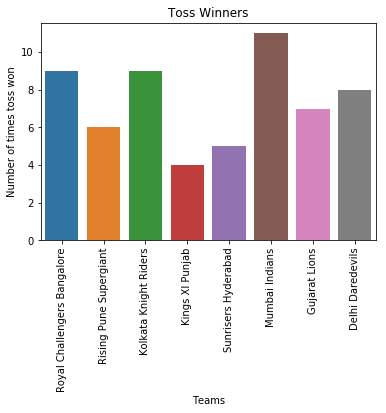

In [55]:
s.countplot(x = 'toss_winner', data= df)
mp.xlabel("Teams")
mp.ylabel("Number of times toss won")
mp.xticks(rotation = 'vertical')
mp.title("Toss Winners")
mp.show()


OBSERVAATION:
    
    -> Mumbai Indians have won the highest number of tosses which is 11
    
    -> Kings XI Punjab have the least count on winning tosses which is 4

TOSS DECISIONS

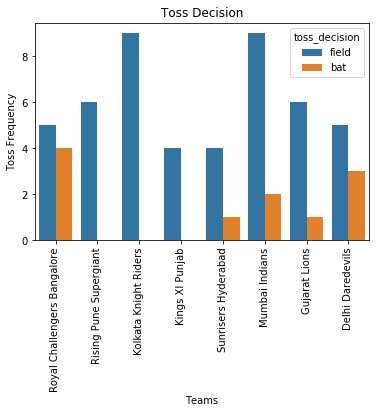

In [56]:
s.countplot(x = 'toss_winner', hue = 'toss_decision', data = df)
mp.xlabel("Teams")
mp.ylabel("Toss Frequency")
mp.xticks(rotation = 'vertical')
mp.title("Toss Decision")
mp.show()

OBSERVATION:
    
    -> Rising Pune Supergiants, Kolkata Knight Riders, Kings XI Punjab have only choosen to field all the times

TOSS RESULTS

       -> In the given dataset we dont have a column on relating the match winner and toss winner
       
       -> Creating a column with "YES" or "NO":
                        
                        -> 'YES' if match winner and team winner is same
                        
                        -> 'NO' if match winner and team winner are different

In [59]:
df['toss_win_match_win'] = np.where(df['toss_winner'] == df['winner'],'yes','no')
df[2:6]

id  season       city        date                        team1  \
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
5   6    2017  Hyderabad  2017-04-09                Gujarat Lions   

                   team2                  toss_winner toss_decision  result  \
2  Kolkata Knight Riders        Kolkata Knight Riders         field  normal   
3        Kings XI Punjab              Kings XI Punjab         field  normal   
4       Delhi Daredevils  Royal Challengers Bangalore           bat  normal   
5    Sunrisers Hyderabad          Sunrisers Hyderabad         field  normal   

   dl_applied                       winner  win_by_runs  win_by_wickets  \
2           0        Kolkata Knight Riders            0              10   
3           0              Kings XI Punjab            0               6   
4           0  Royal Challengers Bangalore           15               0   
5           0          Sunrisers Hyderabad            0               9   

  player_of_match                                      venue       umpire1  \
2         CA Lynn     Saurashtra Cricket Association Stadium   Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium  AK Chaudhary   
4       KM Jadhav                      M Chinnaswamy Stadium           NaN   
5     Rashid Khan  Rajiv Gandhi International Stadium, Uppal    A Deshmukh   

         umpire2 umpire3 toss_win_match_win  
2      CK Nandan     NaN                yes  
3  C Shamshuddin     NaN                yes  
4            NaN     NaN                yes  
5       NJ Llong     NaN                yes

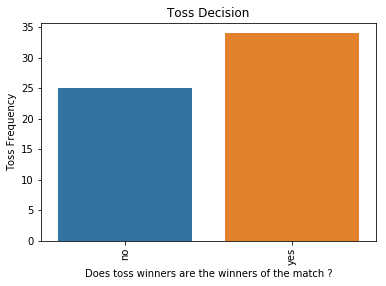

In [63]:
s.countplot(x = 'toss_win_match_win', data = df)
mp.xlabel("Does toss winners are the winners of the match ?")
mp.ylabel("Toss Frequency")
mp.xticks(rotation = 'vertical')
mp.title("Toss Decision")
mp.show()

OBSERVATION:
    
    -> The toss winners have won 34 matches on total of 59 matches
    
    -> The toss winners have lost 25 matches out of 59 matches

TOSS RESULTS

         EFFECT OF TOSS RESULT ON EACH TEAM

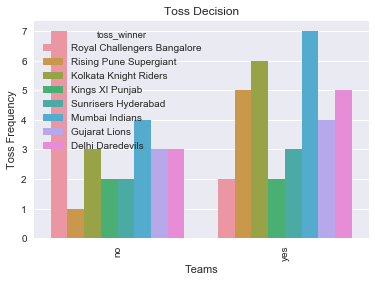

In [71]:
s.set(style='darkgrid')
s.countplot(x = 'toss_win_match_win', hue = 'toss_winner', data = df)
mp.xlabel("Teams")
mp.ylabel("Toss Frequency")
mp.xticks(rotation = 'vertical')
mp.title("Toss Decision")
mp.show()

OBSERVATION:
    
    -> Mumbai Indians have the highest match wins when they won the toss
    
    -> Royal Challengers Banglore have lost the highest number of matches when they lose the toss

ANALYSIS ON TARGETS

           -> If a team chases then it will win by wickets
    
           -> If a team defends then it will win by runs
        
Creating a column TARGET:
    
          -> CHASED if a team win_by_runs = 0 and win_by_wickets != 0
        
          -> DEFENDED if a team win_by_runs != 0 and win_by_wickets = 0

In [72]:
df['target'] = np.where((df['win_by_runs'] == 0) & (df['win_by_wickets'] != 0), 'chased','defended')

In [74]:
df[0:7]

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
5   6    2017  Hyderabad  2017-04-09                Gujarat Lions   
6   7    2017     Mumbai  2017-04-09        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   
5          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
6               Mumbai Indians               Mumbai Indians         field   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   
5  normal           0          Sunrisers Hyderabad            0   
6  normal           0               Mumbai Indians            0   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   
5               9     Rashid Khan  Rajiv Gandhi International Stadium, Uppal   
6               4          N Rana                           Wankhede Stadium   

          umpire1        umpire2 umpire3 toss_win_match_win    target  
0     AY Dandekar       NJ Llong     NaN                 no  defended  
1  A Nand Kishore         S Ravi     NaN                yes    chased  
2     Nitin Menon      CK Nandan     NaN                yes    chased  
3    AK Chaudhary  C Shamshuddin     NaN                yes    chased  
4             NaN            NaN     NaN                yes  defended  
5      A Deshmukh       NJ Llong     NaN                yes    chased  
6     Nitin Menon      CK Nandan     NaN                yes    chased

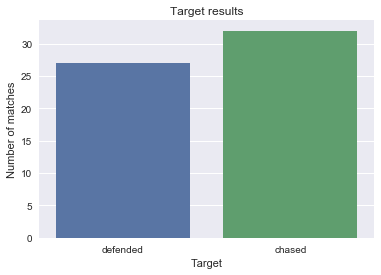

In [75]:
s.set(style = 'darkgrid')
s.countplot(x = 'target', data = df)
mp.xlabel('Target')
mp.ylabel("Number of matches")
mp.title("Target results")
mp.show()

OBSERVATION:
    
    -> The teams who were chasing the target have the most wins that the defending teams

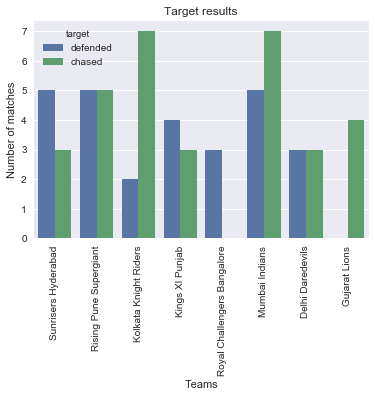

In [81]:
s.set(style = 'darkgrid')
s.countplot(x = 'winner', hue = 'target' ,data = df)
mp.xlabel('Teams')
mp.ylabel("Number of matches")
mp.title("Target results")
mp.xticks(rotation = 'vertical')
mp.show()

OBSERVATION:
    
    -> Kolkata Knight Riders, Mumbai Indians are very good at chasing the target
    
    -> Sunrisers Hyderabad, Rising Pune Supergiants, Mumbai Indians are good at defending the target

NUMBER OF MATCHES WON BY EACH TEAM

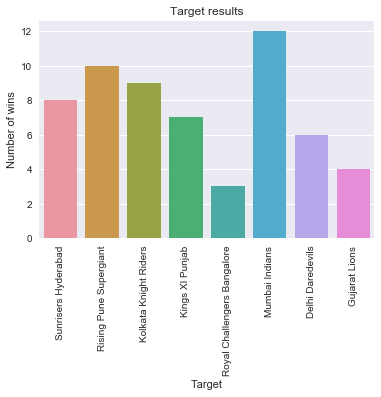

In [83]:
s.set(style = 'darkgrid')
s.countplot(x = 'winner', data = df)
mp.xlabel('Target')
mp.ylabel("Number of wins")
mp.title("Target results")
mp.xticks(rotation = 'vertical')
mp.show()

OBSERVATION:
    
    -> Mumbai Indians have the highest wins and Royal Challengers Banglore have the highest losses

NOTE: So far we have done analysis on toss related features, lets analyse on the Scores and Wickets

ANALYSIS ON SCORES, WICKETS AND THEIR RESULTS

In [193]:
df1 = pd.read_csv('deliveries.csv')
df2 = pd.DataFrame(df['id'])
df2 = df2.rename(columns={'id':'match_id'})

In [194]:
data = pd.merge(df1,df2,on='match_id')

In [195]:
data

match_id  inning            batting_team                 bowling_team  \
0             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
1             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
2             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
3             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
4             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
5             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
6             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
7             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
8             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
9             1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
10            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
11            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
12            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
13            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
14            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
15            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
16            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
17            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
18            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
19            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
20            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
21            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
22            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
23            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
24            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
25            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
26            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
27            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
28            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
29            1       1     Sunrisers Hyderabad  Royal Challengers Bangalore   
...         ...     ...                     ...                          ...   
13832        59       2  Rising Pune Supergiant               Mumbai Indians   
13833        59       2  Rising Pune Supergiant               Mumbai Indians   
13834        59       2  Rising Pune Supergiant               Mumbai Indians   
13835        59       2  Rising Pune Supergiant               Mumbai Indians   
13836        59       2  Rising Pune Supergiant               Mumbai Indians   
13837        59       2  Rising Pune Supergiant               Mumbai Indians   
13838        59       2  Rising Pune Supergiant               Mumbai Indians   
13839        59       2  Rising Pune Supergiant               Mumbai Indians   
13840        59       2  Rising Pune Supergiant               Mumbai Indians   
13841        59       2  Rising Pune Supergiant               Mumbai Indians   
13842        59       2  Rising Pune Supergiant               Mumbai Indians   
13843        59       2  Rising Pune Supergiant               Mumbai Indians   
13844        59       2  Rising Pune Supergiant               Mumbai Indians   
13845        59       2  Rising Pune Supergiant               Mumbai Indians   
13846        59       2  Rising Pune Supergiant               Mumbai Indians   
13847        59       2  Rising Pune Supergiant               Mumbai Indians   
13848        59       2  Rising Pune Supergiant               Mumbai Indians   
13849        59       2  Rising Pune Supergiant               Mumbai Indians   
13850  

BATSMENS WITH MOST RUNS

In [196]:
runs = data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
runs[:20]

batsman
DA Warner      641
G Gambhir      498
S Dhawan       479
SPD Smith      472
SK Raina       442
HM Amla        420
MK Pandey      396
PA Patel       395
KA Pollard     395
RA Tripathi    391
RV Uthappa     388
SV Samson      386
AM Rahane      382
RR Pant        366
KD Karthik     361
SS Iyer        338
RG Sharma      333
N Rana         333
MK Tiwary      324
BB McCullum    320
Name: batsman_runs, dtype: int64

Text(0,0.5,'Runs')

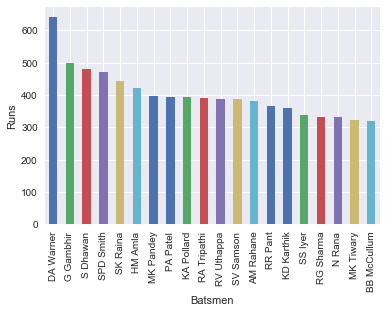

In [197]:
runs[:20].plot(kind = 'bar')
mp.xlabel('Batsmen')
mp.ylabel('Runs')

BOWLERS WITH MORE EXPENSIVE RUNS

In [198]:
bowl = data.groupby('bowler')['total_runs'].sum().sort_values(ascending = False)
bowl[:20]

bowler
MJ McClenaghan    512
JJ Bumrah         455
UT Yadav          432
Basil Thampi      428
SP Narine         412
MM Sharma         412
Sandeep Sharma    402
PJ Cummins        393
CR Woakes         393
SL Malinga        388
B Kumar           384
Imran Tahir       370
Rashid Khan       368
AR Patel          366
RA Jadeja         352
YS Chahal         351
Kuldeep Yadav     345
A Mishra          345
JD Unadkat        330
BA Stokes         327
Name: total_runs, dtype: int64

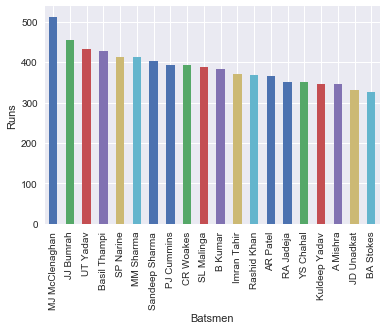

In [200]:
bowl[:20].plot(kind = 'bar')
mp.xlabel('Batsmen')
mp.ylabel('Runs')
mp.show()

RUNS SCORED BY EACH TEAM

In [201]:
team = data.groupby('batting_team')['total_runs'].sum().sort_values(ascending = False)
team[:20]

batting_team
Mumbai Indians                 2800
Kolkata Knight Riders          2484
Rising Pune Supergiant         2470
Gujarat Lions                  2412
Sunrisers Hyderabad            2349
Delhi Daredevils               2219
Kings XI Punjab                2207
Royal Challengers Bangalore    1845
Name: total_runs, dtype: int64

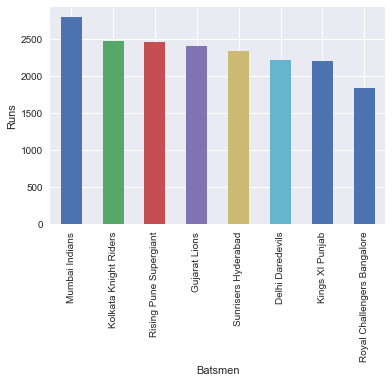

In [202]:
team[:20].plot(kind = 'bar')
mp.xlabel('Batsmen')
mp.ylabel('Runs')
mp.show()

ANALYZING THE BOUNDARIES

In [205]:
boundary=data[(data['batsman_runs']==4)|(data['batsman_runs']==6)]

In [207]:
boundary['batsman_runs'].value_counts()

4    1612
6     706
Name: batsman_runs, dtype: int64

Text(0,0.5,'Count')

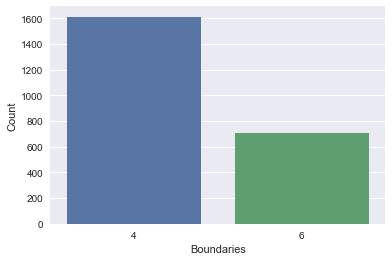

In [210]:
s.countplot(x= 'batsman_runs',data= boundary)
mp.xlabel("Boundaries")
mp.ylabel("Count")

TOP BATSMENS WITH HIGHEST BOUNDARIES

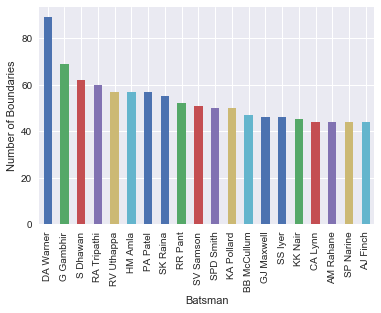

In [214]:
bat_bound = boundary.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)
bat_bound[:20].plot(kind = 'bar')
mp.xlabel('Batsman')
mp.ylabel("Number of Boundaries")
mp.show()

TOP BOWLERS WITH HIGHEST BOUNDARIES HIT AGAINST THEM

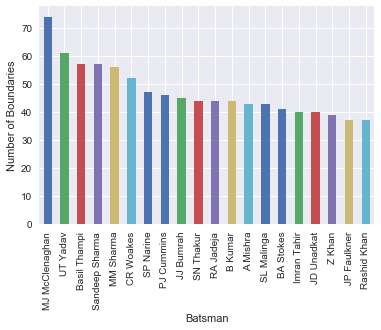

In [215]:
ball_bound = boundary.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False)
ball_bound[:20].plot(kind = 'bar')
mp.xlabel('Batsman')
mp.ylabel("Number of Boundaries")
mp.show()

IPL 2017 FINAL MATCH ANALYSIS

In [227]:
ddf = pd.DataFrame(df.tail(1)['id'])

In [228]:
ddf = ddf.rename(columns= {'id':'match_id'})
final = pd.merge(data,ddf,on= 'match_id')
final

match_id  inning            batting_team            bowling_team  over  \
0          59       1          Mumbai Indians  Rising Pune Supergiant     1   
1          59       1          Mumbai Indians  Rising Pune Supergiant     1   
2          59       1          Mumbai Indians  Rising Pune Supergiant     1   
3          59       1          Mumbai Indians  Rising Pune Supergiant     1   
4          59       1          Mumbai Indians  Rising Pune Supergiant     1   
5          59       1          Mumbai Indians  Rising Pune Supergiant     1   
6          59       1          Mumbai Indians  Rising Pune Supergiant     2   
7          59       1          Mumbai Indians  Rising Pune Supergiant     2   
8          59       1          Mumbai Indians  Rising Pune Supergiant     2   
9          59       1          Mumbai Indians  Rising Pune Supergiant     2   
10         59       1          Mumbai Indians  Rising Pune Supergiant     2   
11         59       1          Mumbai Indians  Rising Pune Supergiant     2   
12         59       1          Mumbai Indians  Rising Pune Supergiant     3   
13         59       1          Mumbai Indians  Rising Pune Supergiant     3   
14         59       1          Mumbai Indians  Rising Pune Supergiant     3   
15         59       1          Mumbai Indians  Rising Pune Supergiant     3   
16         59       1          Mumbai Indians  Rising Pune Supergiant     3   
17         59       1          Mumbai Indians  Rising Pune Supergiant     3   
18         59       1          Mumbai Indians  Rising Pune Supergiant     4   
19         59       1          Mumbai Indians  Rising Pune Supergiant     4   
20         59       1          Mumbai Indians  Rising Pune Supergiant     4   
21         59       1          Mumbai Indians  Rising Pune Supergiant     4   
22         59       1          Mumbai Indians  Rising Pune Supergiant     4   
23         59       1          Mumbai Indians  Rising Pune Supergiant     4   
24         59       1          Mumbai Indians  Rising Pune Supergiant     5   
25         59       1          Mumbai Indians  Rising Pune Supergiant     5   
26         59       1          Mumbai Indians  Rising Pune Supergiant     5   
27         59       1          Mumbai Indians  Rising Pune Supergiant     5   
28         59       1          Mumbai Indians  Rising Pune Supergiant     5   
29         59       1          Mumbai Indians  Rising Pune Supergiant     5   
..        ...     ...                     ...                     ...   ...   
218        59       2  Rising Pune Supergiant          Mumbai Indians    16   
219        59       2  Rising Pune Supergiant          Mumbai Indians    16   
220        59       2  Rising Pune Supergiant          Mumbai Indians    16   
221        59       2  Rising Pune Supergiant          Mumbai Indians    16   
222        59       2  Rising Pune Supergiant          Mumbai Indians    16   
223        59       2  Rising Pune Supergiant          Mumbai Indians    16   
224        59       2  Rising Pune Supergiant          Mumbai Indians    17   
225        59       2  Rising Pune Supergiant          Mumbai Indians    17   
226        59       2  Rising Pune Supergiant          Mumbai Indians    17   
227        59       2  Rising Pune Supergiant          Mumbai Indians    17   
228        59       2  Rising Pune Supergiant          Mumbai Indians    17   
229        59       2  Rising Pune Supergiant          Mumbai Indians    17   
230        59       2  Rising Pune Supergiant          Mumbai Indians    18   
231        59       2  Rising Pune Supergiant          Mumbai Indians    18   
232        59       2  Rising Pune Supergiant          Mumbai Indians    18   
233        59       2  Rising Pune Supergiant          Mumbai Indians    18   
234        59       2  Rising Pune Supergiant          Mumbai Indians    18   
235        59       2  Rising Pune Supergiant          Mumbai Indians    18   
236        59       2  Rising Pune Supergiant          

In [230]:
mi = final[final['batting_team']=='Mumbai Indians']
rps = final[final['batting_team'] == 'Rising Pune Supergiant']

RUNS SCORED PER OVER BY MUMBAI INDIANS

In [232]:
mi.groupby(['bowling_team','over','bowler'])['total_runs'].sum()

bowling_team            over  bowler           
Rising Pune Supergiant  1     JD Unadkat            3
                        2     Washington Sundar     4
                        3     JD Unadkat            2
                        4     Washington Sundar     2
                        5     SN Thakur             5
                        6     LH Ferguson          16
                        7     A Zampa               9
                        8     LH Ferguson           5
                        9     A Zampa               4
                        10    Washington Sundar     6
                        11    A Zampa               9
                        12    Washington Sundar     1
                        13    A Zampa              10
                        14    DT Christian          3
                        15    SN Thakur             2
                        16    DT Christian          5
                        17    JD Unadkat            6
                        18    DT C

RUNS SCORED PER OVER BY RISING PUNE SUPERGIANTS

In [233]:
rps.groupby(['bowling_team','over','bowler'])['total_runs'].sum()

bowling_team    over  bowler    
Mumbai Indians  1     KH Pandya      6
                2     MG Johnson     8
                3     JJ Bumrah      7
                4     SL Malinga     2
                5     KV Sharma      9
                6     SL Malinga     6
                7     KV Sharma      5
                8     JJ Bumrah      5
                9     KV Sharma      2
                10    MG Johnson     8
                11    KH Pandya      7
                12    MG Johnson     6
                13    KV Sharma      2
                14    KH Pandya      4
                15    SL Malinga     6
                16    KH Pandya     14
                17    JJ Bumrah      3
                18    SL Malinga     7
                19    JJ Bumrah     12
                20    MG Johnson     9
Name: total_runs, dtype: int64

PLOT ON RUNS SECURED BY THE TWO TEAMS

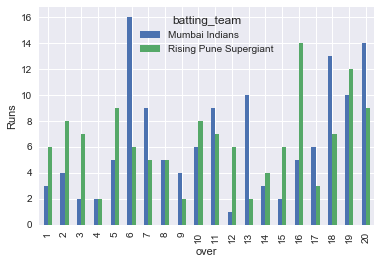

In [234]:
final.groupby(['over','batting_team'])['total_runs'].sum().unstack().plot(kind='bar')
mp.ylabel('Runs')
mp.show()

RUNS SCORED BY MUMBAI INDIANS TEAM

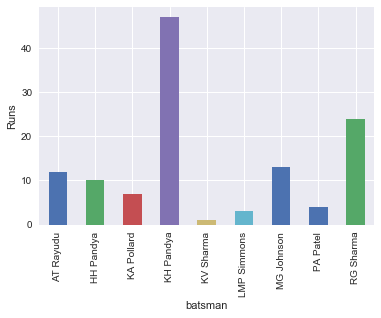

In [237]:
mi.groupby('batsman')['batsman_runs'].sum().plot(kind='bar')
mp.ylabel('Runs')
mp.show()

RUNS SCORED BY RISING PUNE SUPERGIANTS TEAM

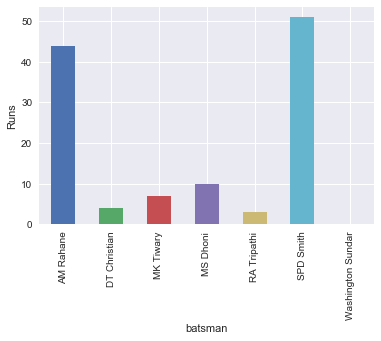

In [239]:
rps.groupby('batsman')['batsman_runs'].sum().plot(kind='bar')
mp.ylabel("Runs")
mp.show()

RUNS SCORED AGAINST RISING PUNE SUPERGIANTS TEAM BOWLERS

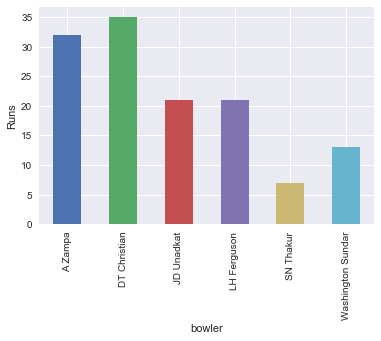

In [243]:
mi.groupby('bowler')['total_runs'].sum().plot(kind = 'bar')
mp.ylabel("Runs")
mp.show()

RUNS SCORED AGAINST MUMBAI INDIANS TEAM BOWLERS

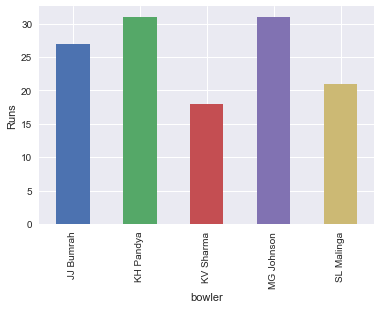

In [244]:
rps.groupby('bowler')['total_runs'].sum().plot(kind='bar')
mp.ylabel('Runs')
mp.show()

TOTAL SCORE OF EACH TEAM IN THE FINAL

In [245]:
final.groupby(['inning','batting_team'])['total_runs'].sum()

inning  batting_team          
1       Mumbai Indians            129
2       Rising Pune Supergiant    128
Name: total_runs, dtype: int64

RESULT

      MUMBAI INDIANS DEFENDED RISING PUNE SUPERGIANTS BY 1 RUN